In [20]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

Setup & Data Preparation

In [21]:
# Download the dataset
path = kagglehub.dataset_download("prajitdatta/movielens-100k-dataset")
print("Path to dataset files:", path)

# Check top-level files/folders
print('\nFiles: ', os.listdir(path))

# The actual dataset folder
data_path= os.path.join(path, 'ml-100k')
print("\nFiles in datasets: ", os.listdir(data_path))


Path to dataset files: C:\Users\Tasneem\.cache\kagglehub\datasets\prajitdatta\movielens-100k-dataset\versions\1

Files:  ['ml-100k']

Files in datasets:  ['allbut.pl', 'mku.sh', 'README', 'u.data', 'u.genre', 'u.info', 'u.item', 'u.occupation', 'u.user', 'u1.base', 'u1.test', 'u2.base', 'u2.test', 'u3.base', 'u3.test', 'u4.base', 'u4.test', 'u5.base', 'u5.test', 'ua.base', 'ua.test', 'ub.base', 'ub.test']


In [22]:
# Load ratings 
ratings= pd.read_csv(
os.path.join(data_path, 'u.data'),
sep='\t',
names=['user_id' , 'movie_id' , 'rating' , 'timestamp']
)

# Load movies titles
movies= pd.read_csv(
    os.path.join(data_path, 'u.item'),
    sep= '|',
    encoding= 'latin-1',
    names=['movie_id', 'movie_title'] + [f'col_{i}' for i in range(22)]
)[['movie_id', 'movie_title']]


# Merge ratings with movie titles
data= pd.merge(ratings,movies, on='movie_id')
data.head()


,user_id,movie_id,rating,timestamp,movie_title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [23]:
#Quick data exploration
print("Number of users: ", data['user_id'].nunique())
print("Number of movies: ", data['movie_id'].nunique())
print("Total Ratings: ", len(data), "\n")
print("Number of missing values:", data.isna().sum())
print("\nNumber of duplicates: ", data.duplicated().sum(), '\n')
data.info()
data.describe()


Number of users:  943
Number of movies:  1682
Total Ratings:  100000 

Number of missing values: user_id        0
movie_id       0
rating         0
timestamp      0
movie_title    0
dtype: int64

Number of duplicates:  0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      100000 non-null  int64 
 1   movie_id     100000 non-null  int64 
 2   rating       100000 non-null  int64 
 3   timestamp    100000 non-null  int64 
 4   movie_title  100000 non-null  object
dtypes: int64(4), object(1)
memory usage: 3.8+ MB


,user_id,movie_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


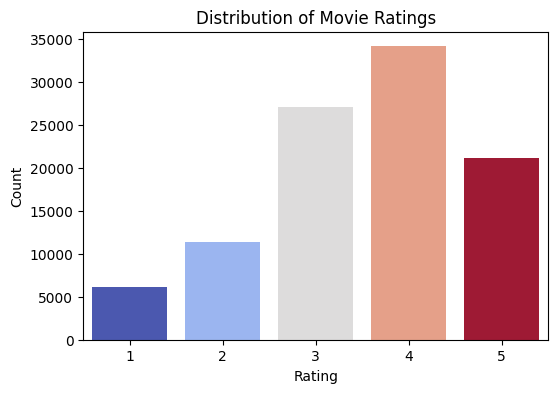

In [24]:
# Visualize basic insights
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=data , palette='coolwarm', hue='rating', legend=False )
plt.title("Distribution of Movie Ratings")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [25]:
# Create user item matrix
user_item_matrix= data.pivot_table(index='user_id', columns='movie_title', values='rating')
user_item_matrix.head()

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [26]:
# Train-Test Split Setup
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
print("Training set:", train_data.shape)
print("Testing set:", test_data.shape)

# Align train and test to have the same movie columns
common_movies = list(set(train_data['movie_id']) & set(test_data['movie_id']))
train_data = train_data[train_data['movie_id'].isin(common_movies)]
test_data = test_data[test_data['movie_id'].isin(common_movies)]

# Create separate train and test user-item matrices
train_matrix= train_data.pivot_table(index='user_id', columns='movie_title', values='rating')
test_matrix= test_data.pivot_table(index='user_id', columns='movie_title', values='rating')

Training set: (80000, 5)
Testing set: (20000, 5)


User-Based Collaborative Filtering

In [27]:
# Fill missing ratings with 0 (unrated movies)
train_matrix_filled= train_matrix.fillna(0)


# Normalize by subtracting the user's mean rating
train_matrix_normalized= train_matrix_filled.sub(train_matrix_filled.mean(axis=1), axis=0)

# Compute cosine similarity between users
user_similarity= cosine_similarity(train_matrix_normalized)

# Convert to DataFrame for readability
user_similarity_df= pd.DataFrame(
    data= user_similarity,
    index= train_matrix.index,
    columns= train_matrix.index
)

user_similarity_df.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.081994,-0.031164,-0.016408,0.207524,0.243497,0.186543,0.226919,0.050767,0.191510,...,0.191612,0.034532,0.111933,0.098444,0.053382,0.041914,0.143387,0.048486,0.031705,0.251509
2,0.081994,1.000000,0.092322,0.158752,0.048201,0.104917,0.018579,0.061657,0.136261,0.077697,...,0.089237,0.253002,0.295807,0.309112,0.211710,0.132244,0.200094,0.101933,0.138501,0.049201
3,-0.031164,0.092322,1.000000,0.352935,-0.049053,0.034916,-0.049618,0.024872,0.045564,0.002201,...,-0.027553,-0.006177,0.120266,0.055954,0.074034,-0.005240,0.066074,0.004560,0.099797,-0.036534
4,-0.016408,0.158752,0.352935,1.000000,-0.021585,0.015402,0.027237,0.127868,0.051192,-0.000194,...,0.003952,0.029340,0.062025,0.155959,0.079096,-0.017716,0.132395,0.102408,0.095226,-0.001016
5,0.207524,0.048201,-0.049053,-0.021585,1.000000,0.084070,0.198182,0.141500,0.011793,0.086096,...,0.211523,0.066016,0.009370,0.032244,0.040984,0.007629,0.147072,0.123868,0.044317,0.180568


In [28]:
# Get Top Similar Users
def get_top_similar_users(user_id, n=5):
    # Sort users by similarity score (excluding the user itself)
    similar_users= user_similarity_df[user_id].sort_values(ascending=False).drop(user_id)
    return similar_users.head(n)

# Example: Top similar users for user_id=7
top_users= get_top_similar_users(7)
print("Top 5 similar users for User 7:\n", top_users)


Top 5 similar users for User 7:
 user_id
650    0.430133
326    0.400865
313    0.393711
766    0.393092
59     0.384859
Name: 7, dtype: float64


In [34]:
# Predict ratings for unseen movies (weighted by similarity)
def predict_ratings(target_user, top_n=5):
    # Get top similar users
    similar_users = get_top_similar_users(target_user, top_n)
    
    # Get their similarity scores
    sim_scores = similar_users.values
    sim_users = similar_users.index
    
    # Weighted average of ratings from similar users
    weighted_ratings = train_matrix_normalized.loc[sim_users].T.dot(sim_scores)
    sum_weights = sim_scores.sum()
    
    predicted_ratings = weighted_ratings / sum_weights

    # Add back the target user's mean to get original scale
    user_mean = train_matrix_filled.loc[target_user].mean()
    predicted_ratings += user_mean
    
    # Remove already rated movies
    already_rated = train_matrix.loc[target_user][train_matrix.loc[target_user] > 0].index
    predicted_ratings = predicted_ratings.drop(already_rated, errors='ignore')
    
    return predicted_ratings.sort_values(ascending=False)

# Example: predict for user 7
predictions = predict_ratings(7)
print("Predicted ratings for unseen movies by User 7:\n", predictions.head(10))


Predicted ratings for unseen movies by User 7:
 movie_title
North by Northwest (1959)                 4.206409
Schindler's List (1993)                   4.117502
Psycho (1960)                             3.977013
Godfather, The (1972)                     3.942993
Wizard of Oz, The (1939)                  3.917645
Citizen Kane (1941)                       3.913763
Manchurian Candidate, The (1962)          3.803026
Monty Python and the Holy Grail (1974)    3.789916
Thin Man, The (1934)                      3.622878
Raiders of the Lost Ark (1981)            3.597512
dtype: float64


In [30]:
# Recommend top-n movies for a user
def recommend_movies(user_id, n_recommendations=5):
    # Check if user exists
    if user_id not in train_matrix.index:
        return pd.Series([])

    predicted_ratings = predict_ratings(user_id)

    # Check if there are any predictions
    if predicted_ratings.empty:
        return pd.Series(dtype=float)

    return predicted_ratings.head(n_recommendations)


# Example: Recommend top 5 movies for user 7
recommendations = recommend_movies(7)
print("Recommended movies for User 7:\n", recommendations)

Recommended movies for User 7:
 movie_title
North by Northwest (1959)    4.206409
Schindler's List (1993)      4.117502
Psycho (1960)                3.977013
Godfather, The (1972)        3.942993
Wizard of Oz, The (1939)     3.917645
dtype: float64


User-Based Model Evaluation

In [31]:
# Evaluate Precision@K
def precision_at_k(user_id, k=5, threshold=3.0):
    # Ensure the user exists in both train and test
    if user_id not in test_matrix.index or user_id not in train_matrix.index:
        return None

    # Actual liked movies in TEST set (ground truth)
    actual_likes = test_matrix.loc[user_id][test_matrix.loc[user_id] >= threshold].index

    if len(actual_likes) == 0:
        return None

    # Predicted top-k recommended movies from TRAIN data
    top_k_recommendations = recommend_movies(user_id, n_recommendations=k).index

    # Compute precision (intersection between liked and recommended movies)
    relevant_recommendations = len(set(actual_likes) & set(top_k_recommendations))

    precision = relevant_recommendations / k
    return precision


In [32]:
# Evaluation for all users in both train and test
common_users= list(set(train_matrix.index) & set(test_matrix.index))
precision_scores= [p for u in common_users if (p := precision_at_k(u, k=5)) is not None]

# Avoid division by zero
avg_precision= sum(precision_scores)/ len(precision_scores) if precision_scores else 0
print("Average Precision@5 across all users:", round(avg_precision,3))

# Save results to DataFrame
results_df= pd.DataFrame({
    'user_id': common_users[:len(precision_scores)],
    'precision_at_5': precision_scores
})

#
project_root = os.path.dirname(os.getcwd())  # one level up from src

# create results directory
results_dir = os.path.join(project_root, 'results')
os.makedirs(results_dir, exist_ok=True)

# Save results to csv
results_path = os.path.join(results_dir, 'evaluation.csv')
results_df.to_csv(results_path, index=False)

print(f"Results saved successfully to:\n{results_path}")

Average Precision@5 across all users: 0.301
Results saved successfully to:
c:\Users\Tasneem\OneDrive\Desktop\Movie_Recommendation_System\results\evaluation.csv


Precision@5 Visualization Across Users

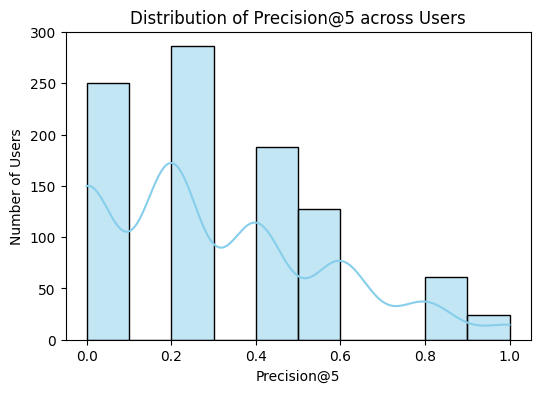

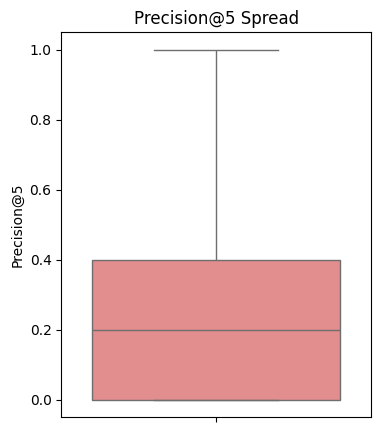

In [33]:
# Histogram showing the distribution of Precision@5
plt.figure(figsize=(6,4))
sns.histplot(results_df['precision_at_5'], bins=10, kde=True,color='skyblue')
plt.title('Distribution of Precision@5 across Users')
plt.xlabel('Precision@5')
plt.ylabel('Number of Users')
plt.show()


# Boxplot to visualize spread and detect outliers in Precision@5
plt.figure(figsize=(4,5))
sns.boxplot(y=results_df['precision_at_5'], color='lightcoral')
plt.title('Precision@5 Spread')
plt.ylabel('Precision@5')
plt.show()